In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))

train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))

test_images = test_images.astype('float32') / 255



In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.1694 - accuracy: 0.9467
Epoch 2/5
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.0459 - accuracy: 0.9859
Epoch 3/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0320 - accuracy: 0.9901
Epoch 4/5
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.0239 - accuracy: 0.9929
Epoch 5/5
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.0195 - accuracy: 0.9944


In [13]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([5.6287967e-11, 1.1460109e-08, 1.0755151e-07, 7.5069728e-08,
       8.5822849e-11, 2.7537126e-09, 2.1561806e-12, 9.9999976e-01,
       6.6494401e-08, 3.4818964e-08], dtype=float32)

In [17]:
predictions[0].argmax()  # 7

7

In [9]:
t1 = test_images[0].flatten()


In [10]:
t1 = t1.reshape(1,784)

In [11]:
model.predict(t1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-2640027a7795>", line 1, in <module>
    model.predict(t1)
  File "C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1013, in predict
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 498, in predict
    workers=workers, use_multiprocessing=use_multiprocessing, **kwargs)
  File "C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 426, in _model_iteration
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 646, in _process_inputs
 

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (1, 784)

In [18]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [19]:
model.predict()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-2640027a7795>", line 1, in <module>
    model.predict(t1)
  File "C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1013, in predict
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 498, in predict
    workers=workers, use_multiprocessing=use_multiprocessing, **kwargs)
  File "C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 426, in _model_iteration
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 646, in _process_inputs
 

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (1, 784)

In [11]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [12]:
img_path = r"C:\Users\Nasir Hussain\Downloads\image.jpeg"
img = image.load_img(img_path, target_size=(150, 150))

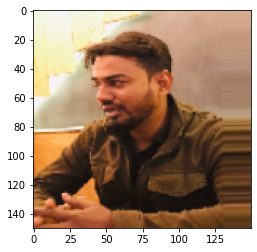

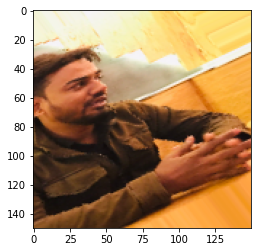

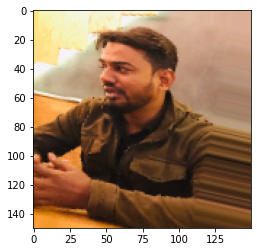

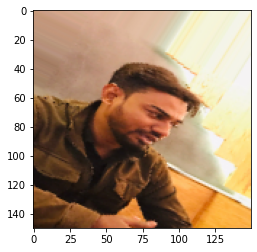

In [13]:
import matplotlib.pyplot as plt
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()